<a href="https://colab.research.google.com/github/Vanluan39/Report-AI-Mid_Term1/blob/main/B%C3%80I1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

#load folder datasets
folder = '/content/drive/MyDrive/tay/'

#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()

for file in listdir(folder):
    output = 0.0
    if file.startswith('huy() '):
        output = 1.0
   
    img = load_img(folder+file, target_size=(200,200))
    photo = img_to_array(img)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

print(photos.shape, labels.shape)

# lưu dữ liệu vừa xử lý
save('tay_photos_train.npy',photos)
save('_labels_train.npy',labels)

(100, 200, 200, 3) (100,)


In [ ]:
import numpy as np
x_train = np.load('/content/tay_photos_train.npy')
y_train = np.load('/content/tay_labels_train.npy')
print(x_train.shape)
print(y_train.shape)

(100, 200, 200, 3)
(100,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(200,200,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=16,epochs = 50,verbose = 1)
#lưu mô hình vừa train
model.save('tay_train.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 50, 50, 64)       

1/1 [==============================] - 0s 195ms/step
Tài vận tốt, Sức khỏe ổn định, tình duyên đào hoa


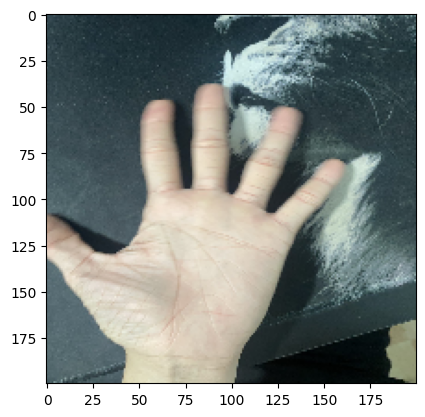

In [ ]:
#load mô hình 
from keras.models import load_model
model5 = load_model('/content/tay_train.h5/')

#load ảnh và cho AI tiến hành nhận diện
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

vat = {1: 'Tài vận tốt, Sức khỏe ổn định, tình duyên đào hoa',2:'Tài vận tốt, Sức khỏe ổn định, tình duyên lận đận', 
       3:'Tài vận tốt, sức khỏe kém, Tình duyên đào hoa', 4:'Tài vận tốt, sức khỏe kém, tình duyên lận đận',
       5:'Tài vận kém, Sức khỏe ổn định, tình duyên đào hoa', 6:'Tài vận kém, Sức khỏe ổn định, tình duyên lận đận'}
img = load_img("/content/drive/MyDrive/tay/huy (18).jpg", target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
output = model5.predict(img)
result = np.argmax(output, axis=1)[0] +1
print(vat[result])